In [1]:
import pandas as pd #for working with dataframe
import numpy as np #for linear algebra

In [2]:
import matplotlib.pyplot as plt #all for visualization
%matplotlib inline
import seaborn as sns

In [3]:
secret = 'Sba121'

In [4]:
import psycopg2 as pg2 #reading data from database

In [5]:
conn = pg2.connect(dbname="testme", user="postgres", password=secret, sslmode="disable")

In [6]:
cur = conn.cursor()

In [7]:
cur.execute('SELECT * FROM wine_quality_red')

In [8]:
from pandas import DataFrame

In [9]:
df_red = pd.DataFrame(cur.fetchall()) #reading whole table

In [10]:
df_red.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
col_names = [] #getting original column names
for i in cur.description:
    col_names.append(i[0])

In [12]:
col_names 

['fixed_acid',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulphur_dioxide',
 'total_sulphur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol',
 'quality']

In [13]:
df_red.rename(columns = {0:'fixed_acid', 1:'volatile_acidity', 2:'citric_acid', 3:'residual_sugar', 4:'chlorides',
                        5:'free_sulphur_dioxide', 6:'total_sulphur_dioxide', 7:'density', 8:'ph', 9:'sulphates',
                        10:'alcohol', 11:'quality'}, inplace = True ) #changed numbers with original column names

In [14]:
df_red.head() #now we get original version

,fixed_acid,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
cur.execute('SELECT * FROM wine_quality_white') #same things as we did to red wine data

In [16]:
df_white = pd.DataFrame(cur.fetchall())

In [17]:
df_white.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [18]:
cur.description

(Column(name='fixed_acid', type_code=701),
 Column(name='volatile_acidity', type_code=701),
 Column(name='citric_acid', type_code=701),
 Column(name='residual_sugar', type_code=701),
 Column(name='chlorides', type_code=701),
 Column(name='free_sulphur_dioxide', type_code=701),
 Column(name='total_sulphur_dioxide', type_code=701),
 Column(name='density', type_code=701),
 Column(name='ph', type_code=701),
 Column(name='sulphates', type_code=701),
 Column(name='alcohol', type_code=701),
 Column(name='quality', type_code=23))

In [19]:
df_white.rename(columns = {0:'fixed_acid', 1:'volatile_acidity', 2:'citric_acid', 3:'residual_sugar', 4:'chlorides',
                        5:'free_sulphur_dioxide', 6:'total_sulphur_dioxide', 7:'density', 8:'ph', 9:'sulphates',
                        10:'alcohol', 11:'quality'}, inplace = True )

In [20]:
df_white.head()

,fixed_acid,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,ph,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [21]:
df_red['color'] = 'red'

In [22]:
df_white['color'] = 'white'

In [23]:
df_red.head()

,fixed_acid,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,ph,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [24]:
df_white.head()

,fixed_acid,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,ph,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


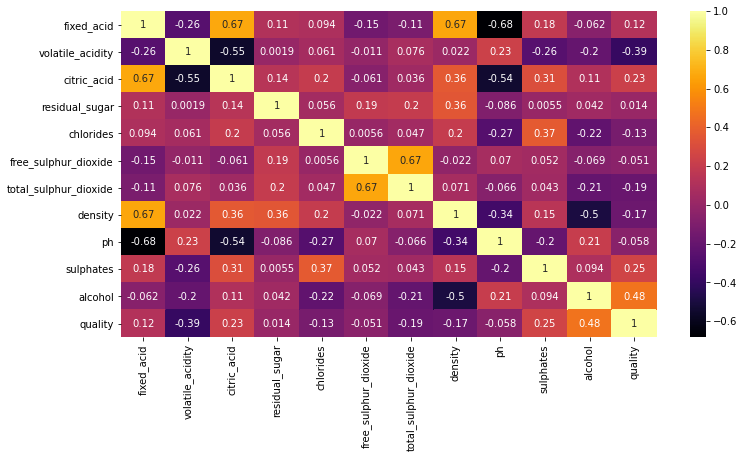

In [25]:
plt.figure(figsize=(12,6)) #let's have a look at the relationship between variables in red wine data
sns.heatmap(df_red.corr(),cmap='inferno', annot=True) #it seems there's no variable have a strong relationship with dependant 
                                                      #variable-y (quality)but there are some between independants

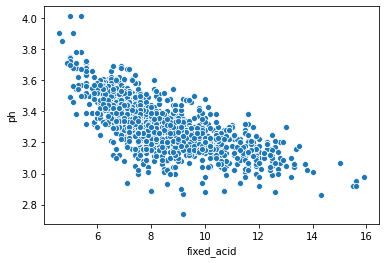

In [26]:
sns.scatterplot(data=df_red, x='fixed_acid', y='ph')

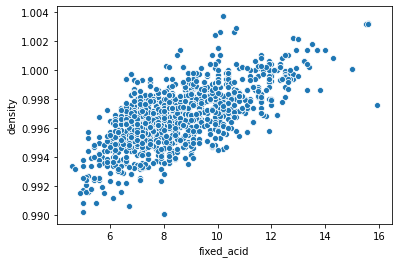

In [27]:
sns.scatterplot(data=df_red, x='fixed_acid', y='density')

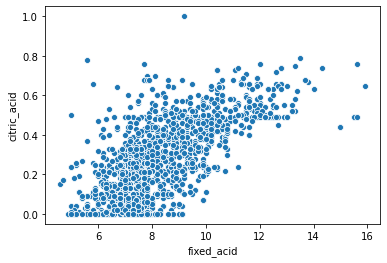

In [28]:
sns.scatterplot(data=df_red, x='fixed_acid', y='citric_acid')

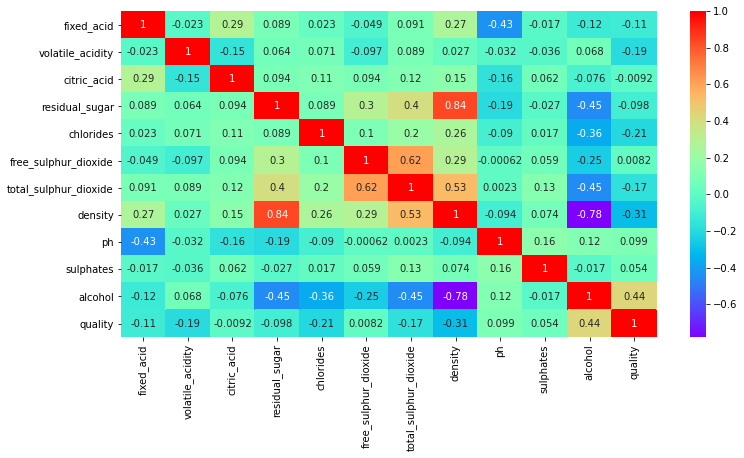

In [29]:
plt.figure(figsize=(12,6)) #same as we did for red wine data
sns.heatmap(df_white.corr(),cmap='rainbow', annot=True)

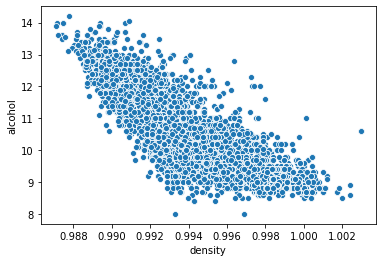

In [30]:
sns.scatterplot(data=df_white.drop(df_white.index[df_white['density'] > 1.005]), x='density', y='alcohol')

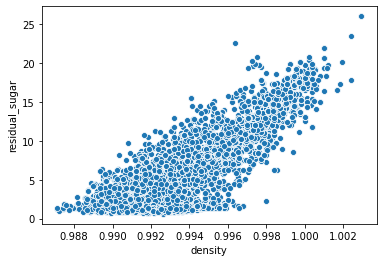

In [31]:
sns.scatterplot(data=df_white.drop(df_white.index[df_white['density'] > 1.01]), x='density', y='residual_sugar')

In [32]:
diff_corr = df_red.corr() - df_white.corr() #we see the biggest difference on the relationship between 
                                            #residual sugar&alcohol

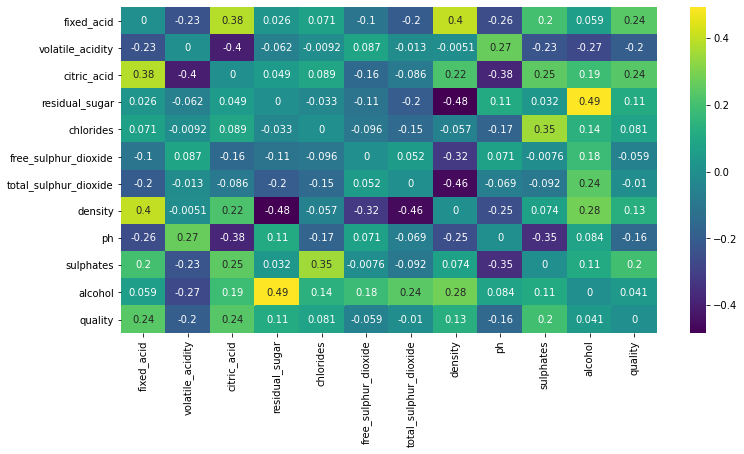

In [33]:
plt.figure(figsize=(12,6))
sns.heatmap(diff_corr, cmap='viridis', annot=True)

In [34]:
df = pd.concat([df_red, df_white]) #combining red&white datasets

In [35]:
df

,fixed_acid,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,ph,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [36]:
df.info() #there are no missing variables and all of them are float or integers except for color

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fixed_acid             6497 non-null   float64
 1   volatile_acidity       6497 non-null   float64
 2   citric_acid            6497 non-null   float64
 3   residual_sugar         6497 non-null   float64
 4   chlorides              6497 non-null   float64
 5   free_sulphur_dioxide   6497 non-null   float64
 6   total_sulphur_dioxide  6497 non-null   float64
 7   density                6497 non-null   float64
 8   ph                     6497 non-null   float64
 9   sulphates              6497 non-null   float64
 10  alcohol                6497 non-null   float64
 11  quality                6497 non-null   int64  
 12  color                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [37]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed_acid,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile_acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric_acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual_sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free_sulphur_dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total_sulphur_dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
ph,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [38]:
df_miss = df.drop('color', axis=1)

AxesSubplot(0.125,0.125;0.775x0.755)


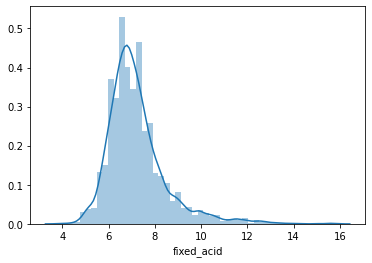

AxesSubplot(0.125,0.125;0.775x0.755)


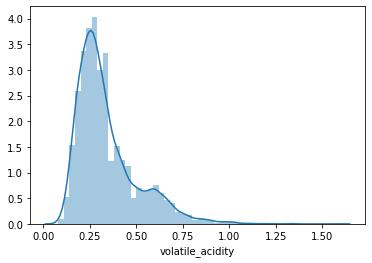

AxesSubplot(0.125,0.125;0.775x0.755)


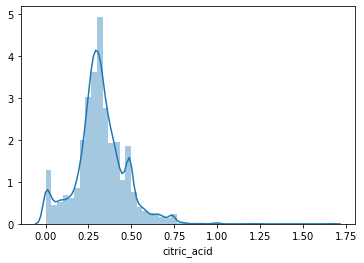

AxesSubplot(0.125,0.125;0.775x0.755)


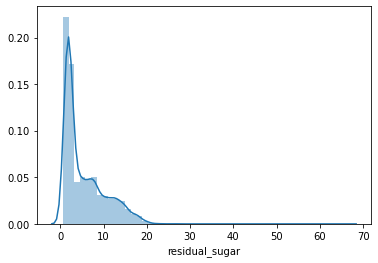

AxesSubplot(0.125,0.125;0.775x0.755)


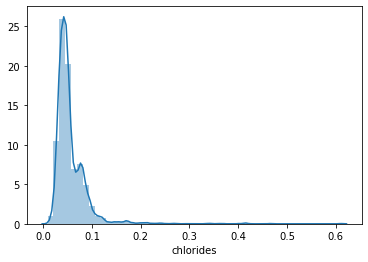

AxesSubplot(0.125,0.125;0.775x0.755)


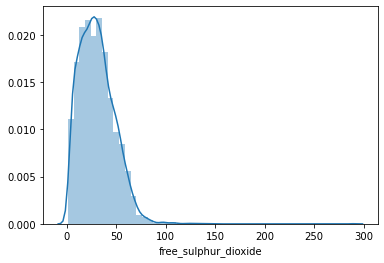

AxesSubplot(0.125,0.125;0.775x0.755)


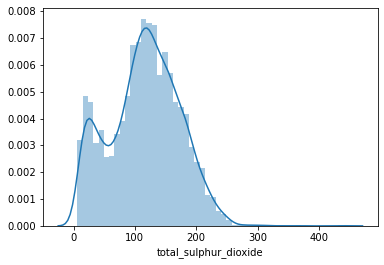

AxesSubplot(0.125,0.125;0.775x0.755)


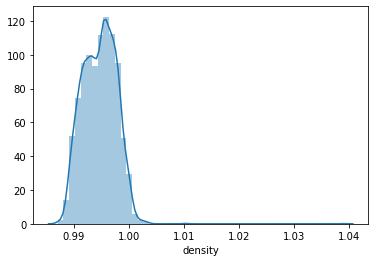

AxesSubplot(0.125,0.125;0.775x0.755)


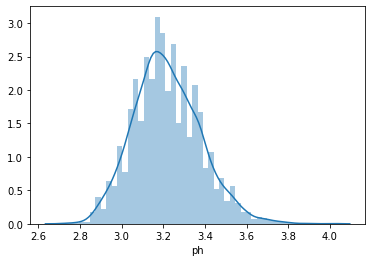

AxesSubplot(0.125,0.125;0.775x0.755)


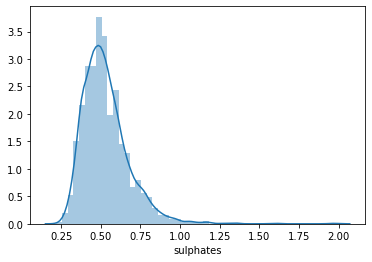

AxesSubplot(0.125,0.125;0.775x0.755)


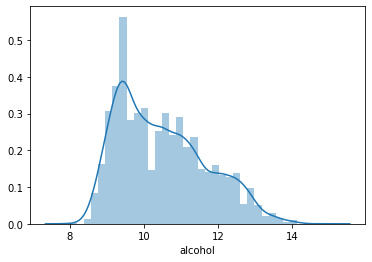

AxesSubplot(0.125,0.125;0.775x0.755)


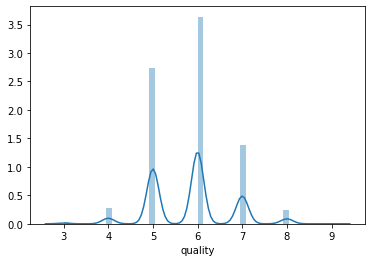

In [39]:
for i in df_miss.columns: #let's have a look at the distribution of variables
    print(sns.distplot(df_miss[i]))
    plt.show()

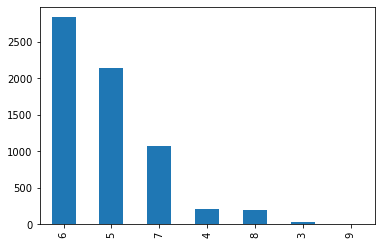

In [40]:
df['quality'].value_counts().plot.bar() 

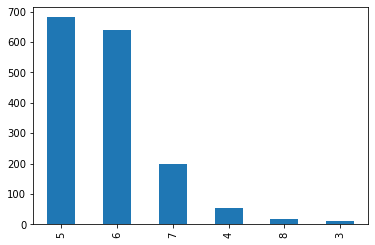

In [41]:
df[df['color'] == 'red']['quality'].value_counts().plot.bar()

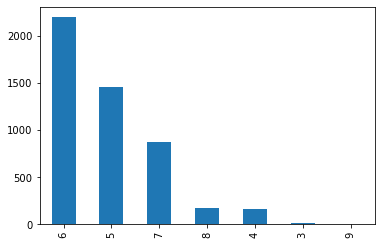

In [42]:
df[df['color'] == 'white']['quality'].value_counts().plot.bar()

In [43]:
df[(df['color'] == 'white') & (df['quality'] == 9)] #wondered the ones have highest score

,fixed_acid,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,ph,sulphates,alcohol,quality,color
774,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,white
820,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,white
827,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,white
876,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,white
1605,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,white


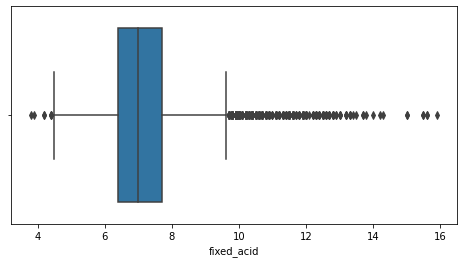

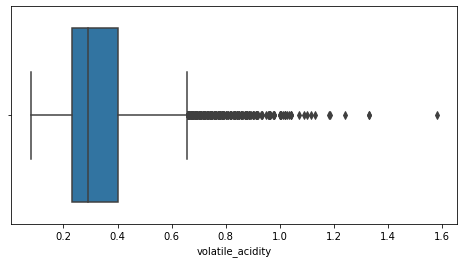

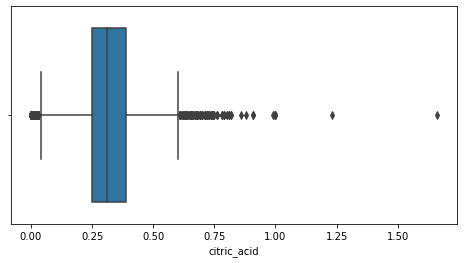

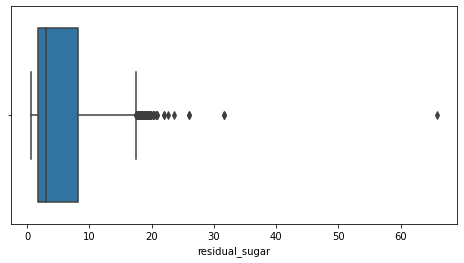

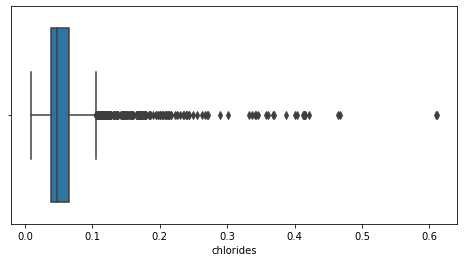

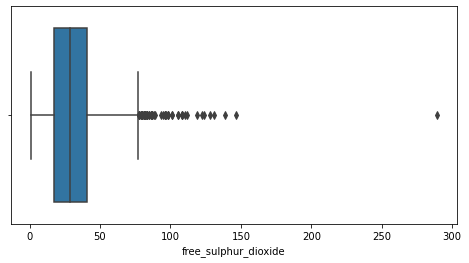

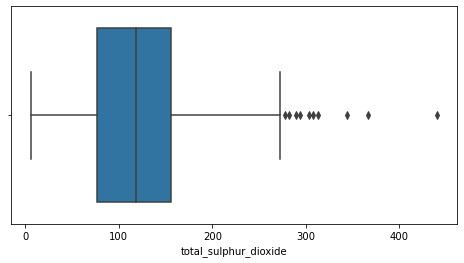

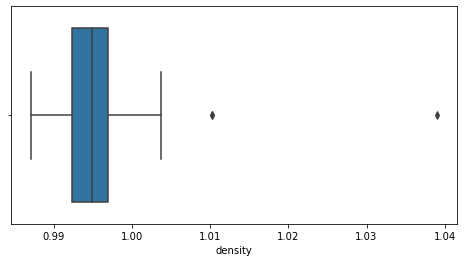

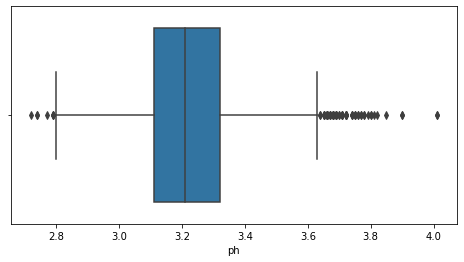

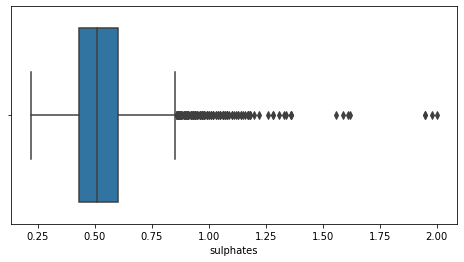

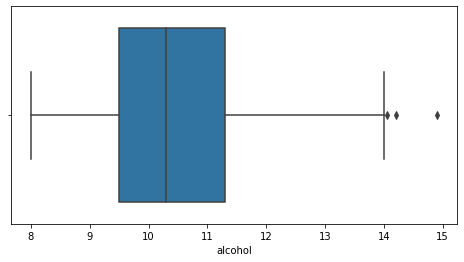

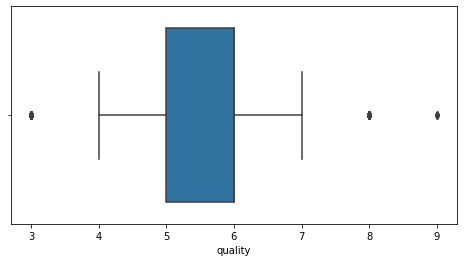

In [44]:
for i in df.drop('color', axis=1).columns: #for checking outliers, whiskers and median
    plt.figure(figsize=(8,4))              #after that we may remove outliers if we need
    sns.boxplot(df.drop('color', axis=1)[i])
    plt.show()

In [45]:
df = df.drop(df.index[df['free_sulphur_dioxide'] > 250], axis=0)

In [46]:
df = df.drop(df.index[df['density'] > 1.03], axis=0)

In [47]:
df = df.drop(df.index[df['sulphates'] > 1.40], axis=0)

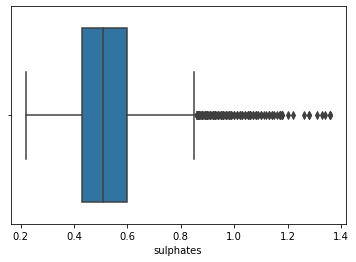

In [48]:
sns.boxplot(x=df['sulphates'], data=df)

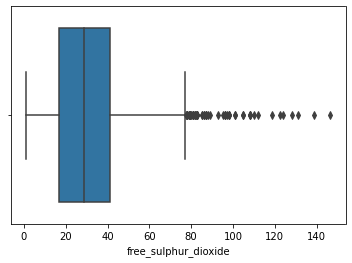

In [49]:
sns.boxplot(x=df['free_sulphur_dioxide'], data=df)

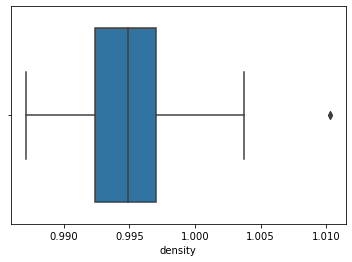

In [50]:
sns.boxplot(x=df['density'], data=df)

In [51]:
df = df.drop(df.index[df['density'] > 1.005], axis=0)

In [52]:
df = df.drop_duplicates() #removing duplicates

In [53]:
len(df[df['color'] == 'red'])

1352

In [54]:
len(df[df['color'] == 'white'])

3952

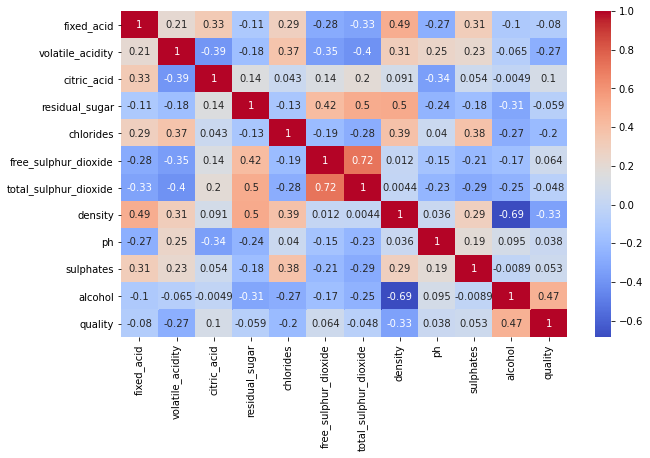

In [55]:
plt.figure(figsize=(10,6)) #looking for the relationship between variables
sns.heatmap(data=df.corr(), cmap='coolwarm', annot=True)

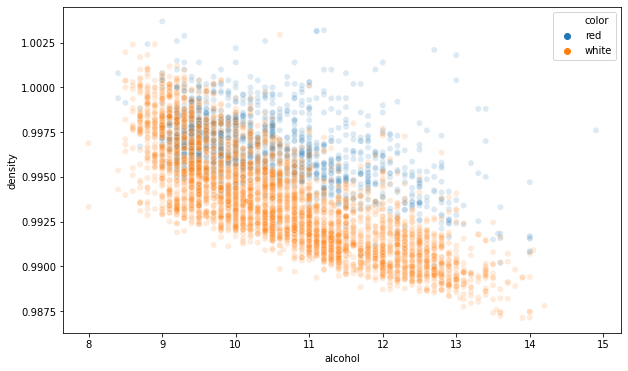

In [56]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='alcohol', y='density', hue='color', alpha=0.15)

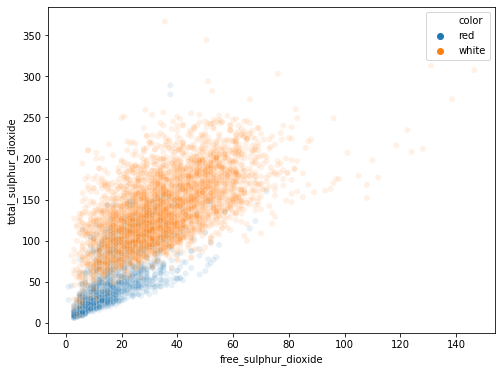

In [57]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='free_sulphur_dioxide', y='total_sulphur_dioxide', hue='color', alpha=0.1)

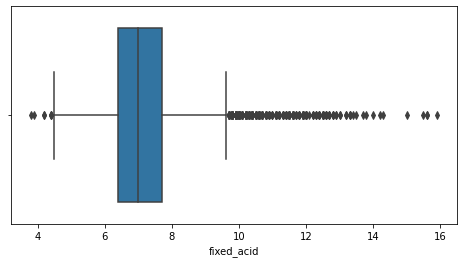

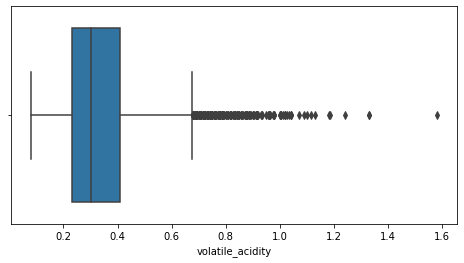

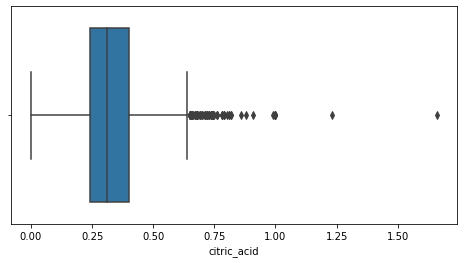

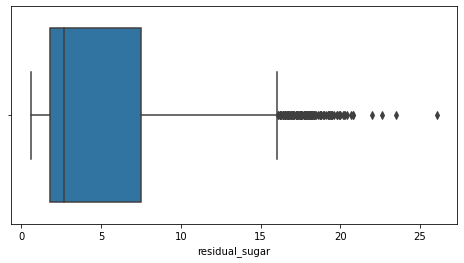

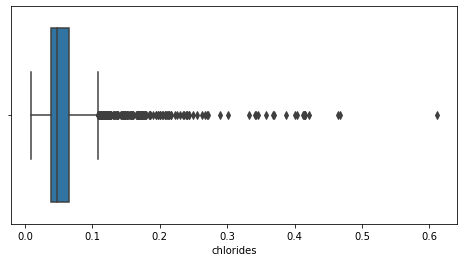

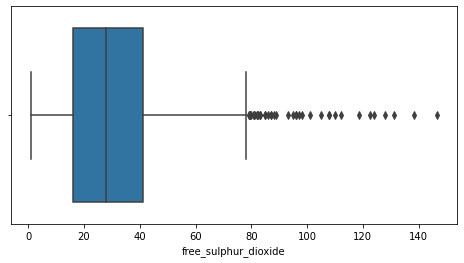

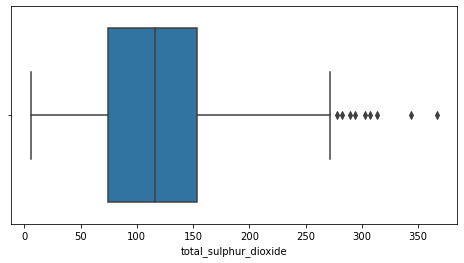

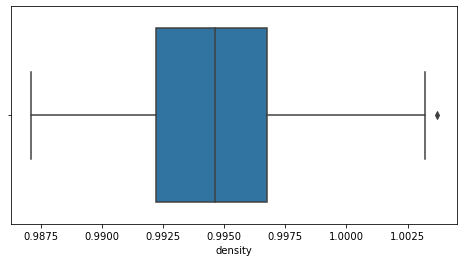

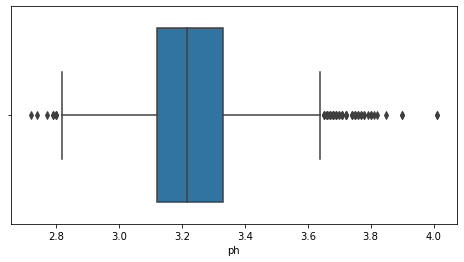

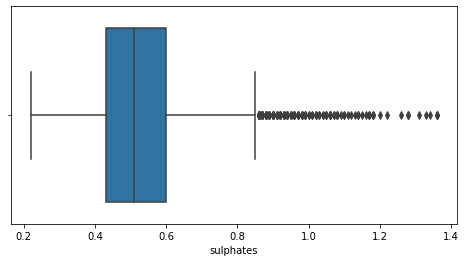

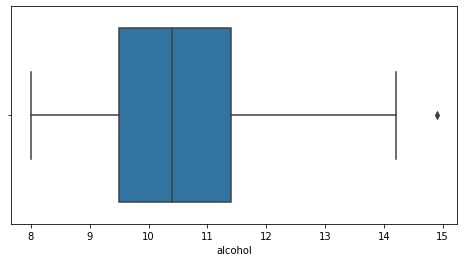

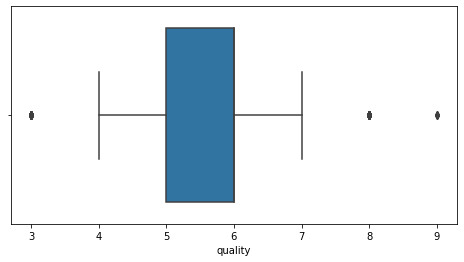

In [58]:
for i in df.drop('color', axis=1).columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(df.drop('color', axis=1)[i])
    plt.show()

In [59]:
df['color2'] = df['color'].map({'white':1, 'red':2}) #changed into numerical variable

In [60]:
df.columns

Index(['fixed_acid', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulphur_dioxide', 'total_sulphur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality', 'color', 'color2'],
      dtype='object')

In [61]:
df = df.drop(df.index[df['volatile_acidity'] > 1.4], axis=0) #removing outliers again

In [62]:
df = df.drop(df.index[df['citric_acid'] > 1.00], axis=0)

In [63]:
df = df.drop(df.index[df['residual_sugar'] > 21], axis=0)

In [64]:
df = df.drop(df.index[df['chlorides'] > 0.45], axis=0)

In [65]:
df = df.drop(df.index[df['alcohol'] > 14.5], axis=0)

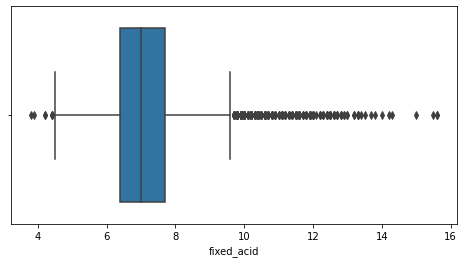

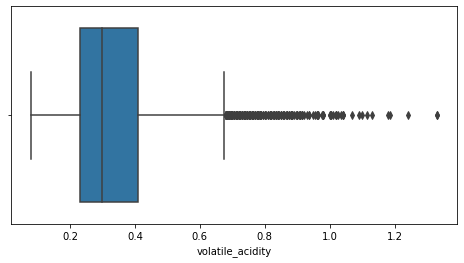

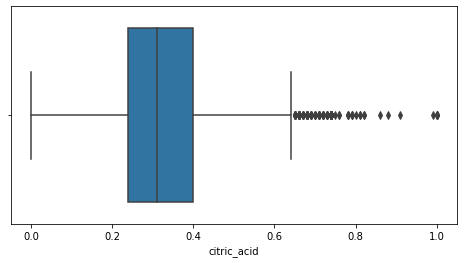

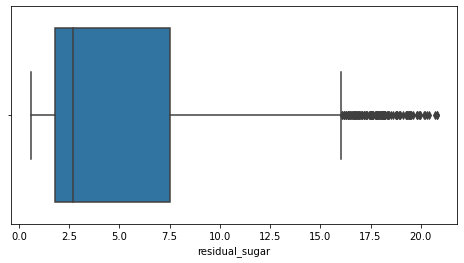

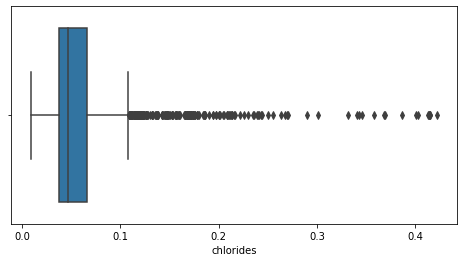

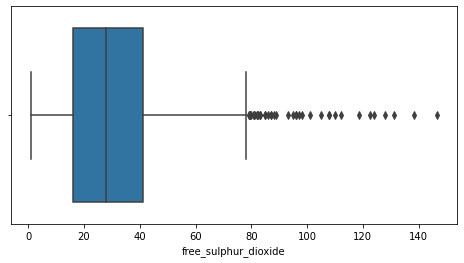

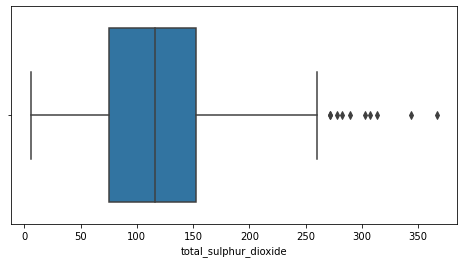

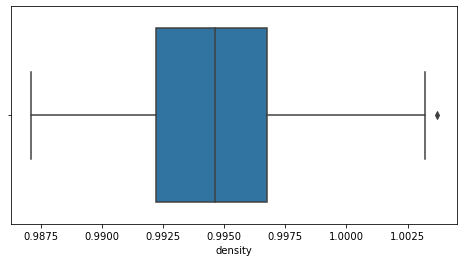

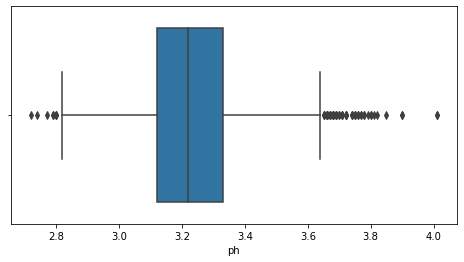

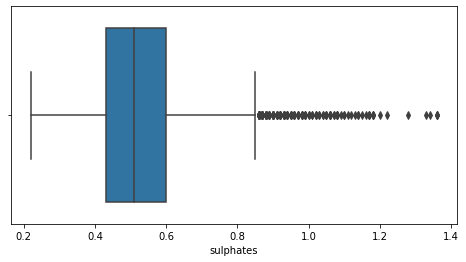

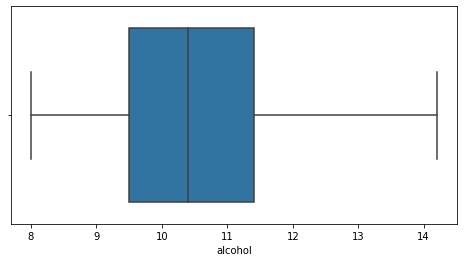

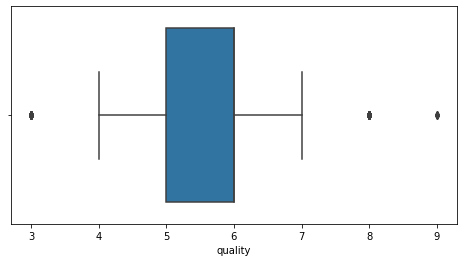

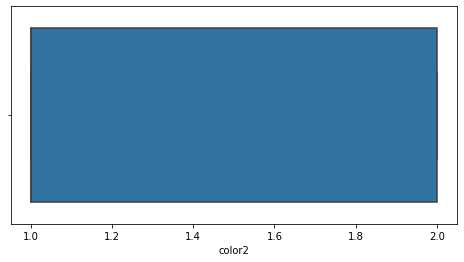

In [66]:
for i in df.drop('color', axis=1).columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(df.drop('color', axis=1)[i])
    plt.show()

In [67]:
df = df.drop('color', axis=1)

In [68]:
X = df.drop('quality', axis=1)
y = df['quality']

In [69]:
from sklearn.model_selection import train_test_split 

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [71]:
from sklearn.preprocessing import RobustScaler #we still have outliers 

In [72]:
scaler = RobustScaler()

In [73]:
X_train = scaler.fit_transform(X_train)

In [74]:
X_test = scaler.transform(X_test)

In [75]:
from sklearn.linear_model import LinearRegression #There will be two different models; linear regression and svm

In [76]:
lm = LinearRegression()

In [77]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
print(lm.intercept_)

5.505988623195755


In [79]:
lm.coef_

array([ 0.1199498 , -0.24124203,  0.02300085,  0.34134744, -0.01701987,
        0.16735001, -0.11153418, -0.56790638,  0.14751513,  0.14337393,
        0.38636937,  0.40172236])

In [80]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Values')

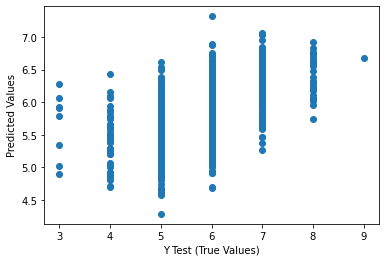

In [81]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

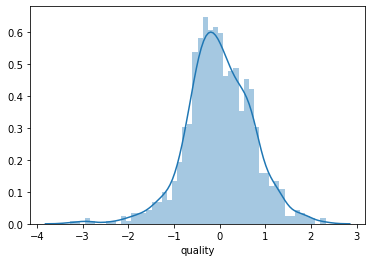

In [82]:
sns.distplot((y_test-predictions),bins=50)

In [83]:
from sklearn import metrics

In [84]:
print('MAE: ', metrics.mean_absolute_error(y_test,predictions))

MAE:  0.5554300545766248


In [85]:
print('MSE: ', metrics.mean_squared_error(y_test,predictions))

MSE:  0.5251381365887751


In [86]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

RMSE:  0.7246641543423926


In [87]:
from sklearn.metrics import r2_score

In [88]:
metrics.explained_variance_score(y_test, predictions) #too low 

0.3342989659855513

In [100]:
from sklearn.model_selection import GridSearchCV #beginning of svm 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [101]:
model = SVC()

In [102]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [103]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [104]:
grid = GridSearchCV(SVC(),param_grid,verbose=5)

In [105]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................


C:\Users\berker_ayaz\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=0.1, gamma=1, score=0.448, total=   0.6s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.444, total=   0.6s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.449, total=   0.6s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.446, total=   0.6s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.439, total=   0.6s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.513, total=   0.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.528, total=   0.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.530, total=   0.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.524, total=   0.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.525, total=   0.4s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.478, total=   0.4s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[CV] .................... C=10, gamma=0.01, score=0.541, total=   0.7s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.525, total=   0.7s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.544, total=   0.8s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.520, total=   0.7s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.543, total=   0.5s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.550, total=   0.6s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.517, total=   0.6s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

[CV] ................ C=1000, gamma=0.0001, score=0.525, total=   1.1s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.545, total=   1.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.543, total=   1.2s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.518, total=   1.5s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.535, total=   1.2s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  2.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [106]:
grid.best_params_

{'C': 10, 'gamma': 0.1}

In [107]:
grid.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [108]:
grid_predictions = grid.predict(X_test)

In [109]:
print(confusion_matrix(y_test,grid_predictions)) 
print('\n')                                      
print(classification_report(y_test,grid_predictions))

[[  0   2   3   3   0   0   0]
 [  0   1  28  10   1   0   0]
 [  1   3 225 119   0   0   0]
 [  0   1  93 341  22   1   0]
 [  0   0   5 125  43   1   0]
 [  0   0   0  20   9   0   0]
 [  0   0   0   1   0   0   0]]


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.14      0.03      0.04        40
           5       0.64      0.65      0.64       348
           6       0.55      0.74      0.63       458
           7       0.57      0.25      0.35       174
           8       0.00      0.00      0.00        29
           9       0.00      0.00      0.00         1

    accuracy                           0.58      1058
   macro avg       0.27      0.24      0.24      1058
weighted avg       0.55      0.58      0.54      1058



C:\Users\berker_ayaz\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
